In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 1 - Importar libs e dataset

import pandas as pd
import numpy as np

link = "/content/drive/MyDrive/Colab Notebooks/dados/result.csv"

dataset = pd.read_csv(link)
datasetHead = dataset.head(50)

# 2 - Destinar features e coluna-alvo

featureNames = ['risk_score', 'amount_requested', 'has_debt', 'income']

X = pd.DataFrame(datasetHead, columns = featureNames)

y = np.array(datasetHead['e_signed'])

In [12]:
# 3 - Definindo classificador

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X, y)

In [13]:
# 4 - Tentando outra forma

from sklearn.tree import export_graphviz

export_graphviz(model, 'tree.dot', feature_names = featureNames)

In [14]:
# 5 - Convertendo .dot para .png

! dot -Tpng tree.dot -o tree.png

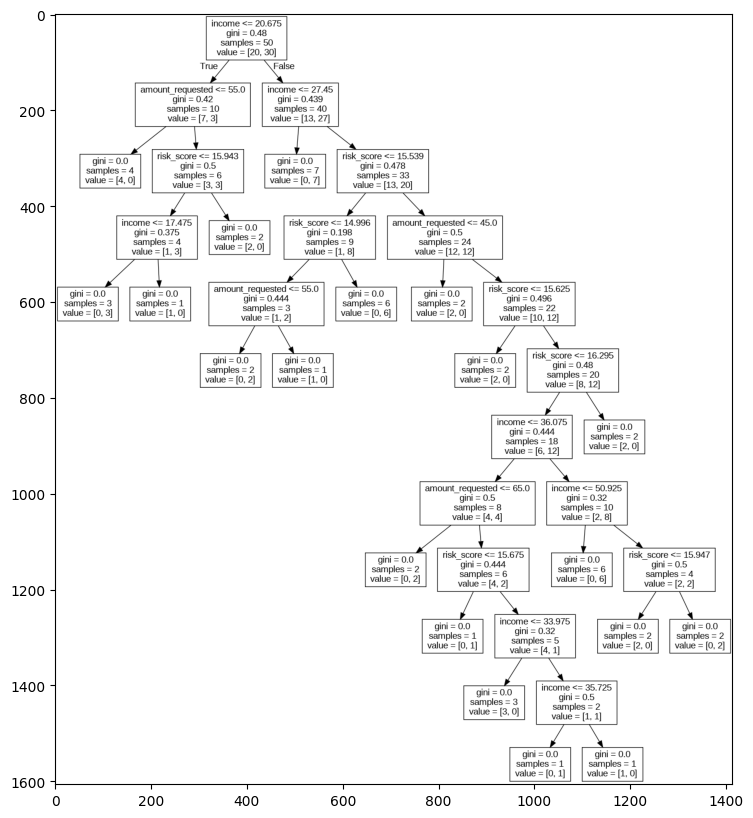

In [15]:
# 6 - Exibir .png gerado

import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img = cv2.imread('tree.png')

plt.figure(figsize = (10, 10))
plt.imshow(img)

In [16]:
# 7 - Melhorando exibição do .png

import graphviz
from sklearn import tree

data = tree.export_graphviz(
    model, 
    out_file=None,
    feature_names=featureNames,
    filled=True, 
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(data)

graph.render("tree") # isso produz um .pdf

'dataset.pdf'

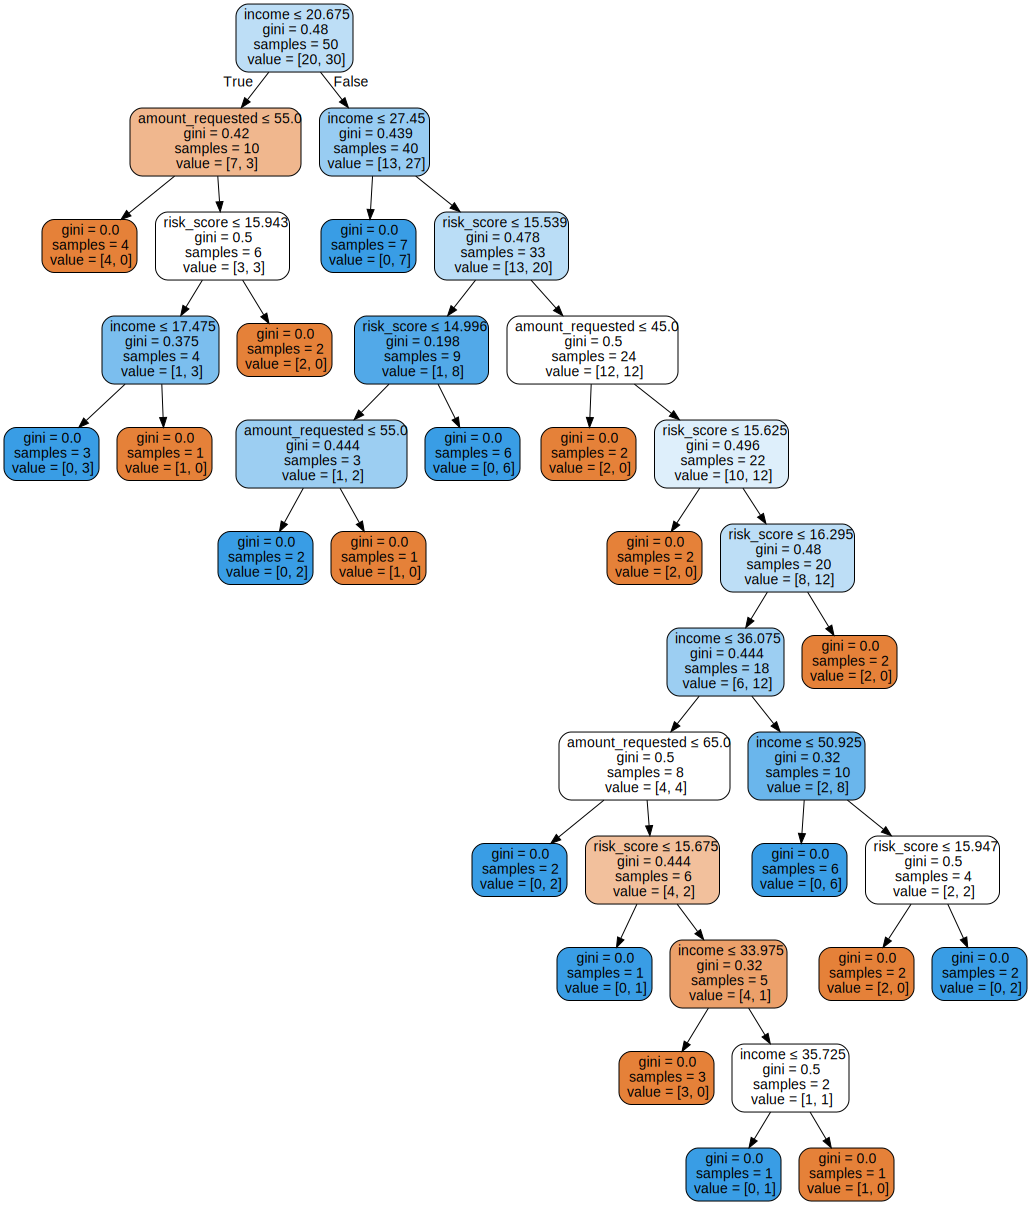

In [17]:
graph # visualizar a árvore de decisão